In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [21]:
clean_wine="Resources/clean_winemag_data.csv"
apclean_wine_df=pd.read_csv(clean_wine)

Reducing the Data Frame and ploting a comparisson between country and price

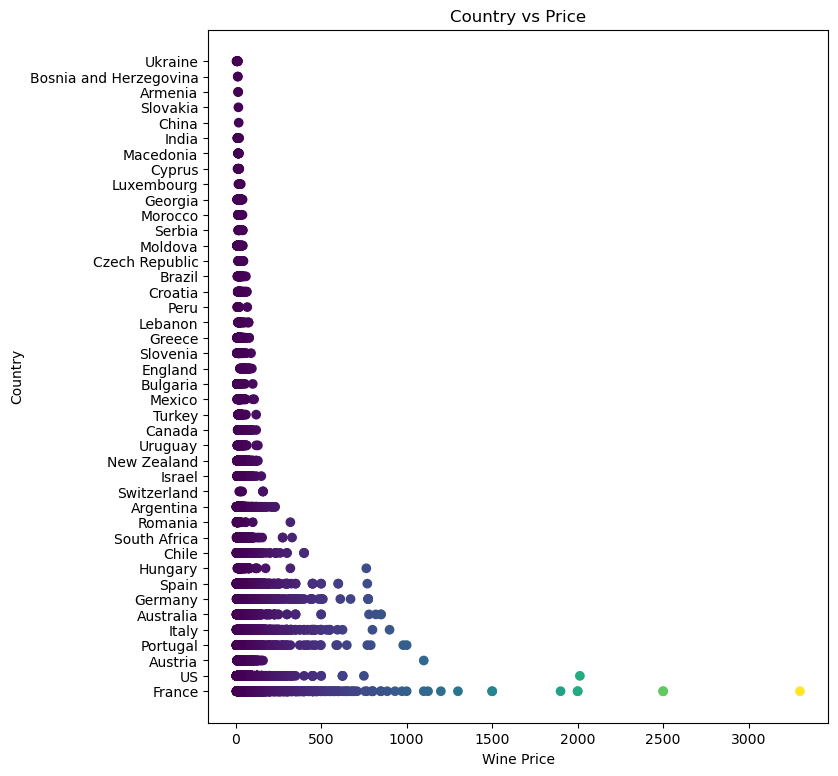

In [22]:
country_price_df = apclean_wine_df[['Country','Price','Rating','Bottle Name']]
sorted_df = country_price_df.sort_values('Price', ascending=False)
plt.figure(figsize=(8,9))
plt.scatter(sorted_df["Price"], sorted_df["Country"], c=sorted_df["Price"])

plt.title('Country vs Price')
plt.xlabel('Wine Price')
plt.ylabel('Country')
plt.show()

Checking the least and most expensive bottle price

In [35]:
print(f"The least expensive wine costs {apclean_wine_df['Price'].min()}")
print(f"The most expensive wine costs {apclean_wine_df['Price'].max()}")

The least expensive wine costs 4.0
The most expensive wine costs 3300.0


Separated the reviews by price range groups and selected the first one hundred bottles with the highest price in each group to compare their rating.

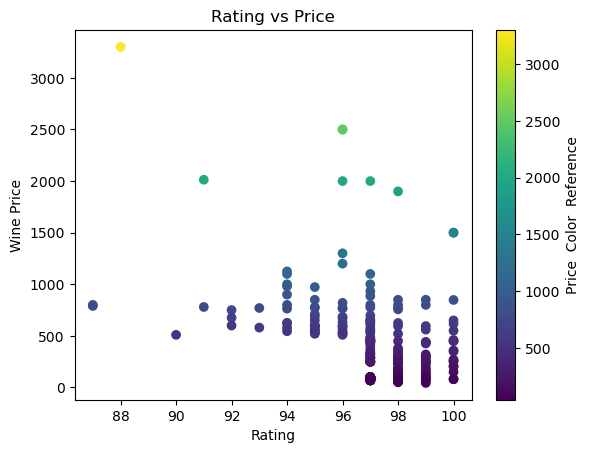

In [28]:
wine_prices_bin=[0, 100, 500, 1000, 5000]
group_names = ['low', 'normal','medium','high']

sorted_df['Price Group'] = pd.cut(sorted_df['Price'],wine_prices_bin,labels=group_names, include_lowest=True)

sorted_df2=sorted_df.sort_values(['Price Group','Rating'],ascending=False).groupby('Price Group').head(100)
sorted_df2

plt.scatter(sorted_df2["Rating"], sorted_df2["Price"], c=sorted_df2["Price"])
plt.title('Rating vs Price')
plt.xlabel('Rating')
plt.ylabel('Wine Price')
clb = plt.colorbar()
clb.set_label("Price  Color  Reference")
plt.show()


Checking how many bottles there are in each group

In [36]:
sorted_df['Price Group'].value_counts()

low       117549
normal      3275
medium        77
high          14
Name: Price Group, dtype: int64

Checking how many reviews there are for the most expensive wine bottle

In [24]:
#Information on the yellow dot
apclean_wine_df[apclean_wine_df['Price']==3300]

,Unnamed: 0,Bottle Name,Type,Winery,Designation,Region,Province,Country,Price,Rating,Sommelier,Sommelier Twitter Handle,Description
74641,80290,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,NaN,Médoc,Bordeaux,France,3300.0,88.0,Roger Voss,@vossroger,This ripe wine shows plenty of blackberry frui...


Checking the average rate value for the Sommelier that reviewed the most expensive wine bottle

In [25]:
#Information about the Sommelier that rated the highest price bottle
sommelier=apclean_wine_df[apclean_wine_df['Sommelier']=="Roger Voss"]['Rating'].mean()

print(f"Roger Voss has an average rate of {sommelier}.")

Roger Voss has an average rate of 88.60613721990879.
